# Accuracy Testing

## Imports

In [1]:
from occupancy_grid import OccupancyGrid
from frontier_algorithms.simple_search import SimpleFrontierDetector
from frontier_algorithms.convolutional import ConvolutionalFrontierDetector
from frontier_algorithms.naiveAA import NaiveActiveArea
from frontier_algorithms.expanding_wavefront import ExpandingWavefront
import numpy as np
import time
from tqdm import tqdm
import pandas as pd

## Finding frontiers

In [2]:
def valid_point(frontier, occupancy_grid):
    return 0 <= frontier[0] < occupancy_grid.shape[0] and 0 <= frontier[1] < occupancy_grid.shape[1]

# occupancy_grid = OccupancyGrid(f'maps/medium-field-medium-explored.tmj', True)

# detection_algorithms = [SimpleFrontierDetector(), ConvolutionalFrontierDetector(8), ConvolutionalFrontierDetector(16), ConvolutionalFrontierDetector(32), ConvolutionalFrontierDetector(64), ConvolutionalFrontierDetector(128), ExpandingWavefront(), NaiveActiveArea()]

# current_frontier = np.zeros((occupancy_grid.height, occupancy_grid.width)) # used for display at the end


# frontiers = detection_algorithms[0].identify_frontiers(occupancy_grid.as_flat(), occupancy_grid.width, occupancy_grid.height, np.array([[100, 100], [70, 500], [275, 180]]))

# frontiers

## Saving to file

In [3]:
# np.save('med-field-med-explored-ground-truth.npy', frontiers)

## Loading back

In [4]:
star_frontiers = np.load('med-field-med-explored-ground-truth.npy')

## Testing the frontiers

In [5]:
from frontier_accuracy import get_connection_points
import matplotlib.pyplot as plt

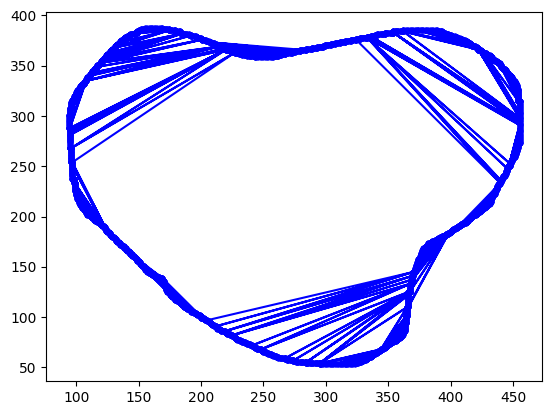

In [6]:
x, y = get_connection_points(star_frontiers, 100)

# true_x, true_y = [point[0] for point in frontiers], [point[1] for point in frontiers]
# plt.plot(true_x, true_y, 'ro')

plt.plot(x, y, 'b.-')
plt.show()

## Filling the map

### Connecting the frontiers

In [7]:
from frontier_accuracy import fill_line

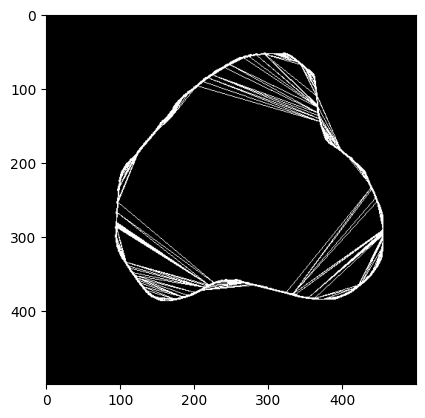

In [8]:
occupancy_map = np.zeros((500, 500))

for i in range(1, len(x)):
    if x[i] is None or x[i-1] is None:
        continue
    fill_line(occupancy_map, x[i-1], y[i-1], x[i], y[i])

plt.imshow(occupancy_map, cmap='gray')

### Filling the areas

In [9]:
from collections import deque

In [10]:
from frontier_accuracy import fill_triangle, flood_fill

In [11]:
triangles_x = [x[i:i+3] for i in range(0, len(x), 5)]
triangles_y = [y[i:i+3] for i in range(0, len(y), 5)]

for x_values, y_values in tqdm(zip(triangles_x, triangles_y), desc="Filling triangles"):
    average_x = sum(x_values) // 3
    average_y = sum(y_values) // 3
    fill_triangle(occupancy_map, x_values[0], y_values[0], x_values[1], y_values[1], x_values[2], y_values[2])

Filling triangles: 2546it [01:15, 33.94it/s] 


Once we fill all the triangles, just a final flood fill for that pesky center region

In [12]:
flood_fill(occupancy_map, 250, 250)

Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0009996891021728516 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0009999275207519531 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0 s for 50 iterations
Took 0.0010006427764892578 s for 50 iterations
Took 0.0 s for 50 

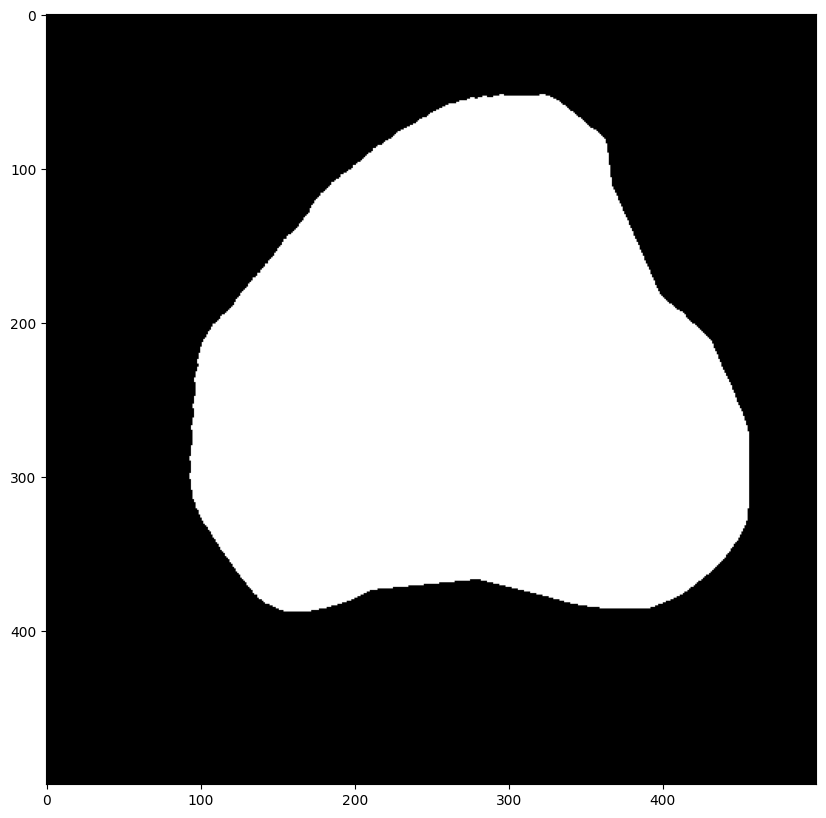

In [13]:
plt.figure(figsize=(20, 10))
plt.imshow(occupancy_map, cmap='gray')